# Title: Exploratory Data Analysis of Rossman Store Sales Dataset
Author: Dana Alhuzaimi

Date: 22 April 2023

URL [https://www.kaggle.com/competitions/rossmann-store-sales/data] 

Date accessed: 25 March 2023

--------------------------

## 1.Introduction

Rossmann is a European company that manages 3000 drug stores across seven different countries. This dataset provides historical sales data for all the Rossmann stores. The sales of each store are influenced by various factors, such as promotions, competition, holidays, store type, assortment, and date. As each manager predicts sales based on their unique circumstances, the accuracy of the results can vary significantly. The aim of this report is to predict daily sales for up to six weeks in advance.To achieve this aim, I will cover several topics related to data preparation and analysis, including cleaning, wrangling, filtering, and visualization.  

Through exploratory data analysis, valuable insights can be obtained to inform future business decisions and strategies for Rossmann stores. The results of this analysis will help the company to understand the impact of various factors on sales and develop appropriate marketing and promotional activities accordingly.  

  -----------------------------

## 2. Ethical considerations 

Some of the ethical questions that can be asked:

***Could the data analysis lead to descrimnation?***  
No, there is no risk of profiling, bias, or discrimination because the analysis only uses data to predict patterns and trends in stores sales without any personal or user data involved. Therefore, the analysis cannot unfairly single out specific groups or individuals based on their characteristics or behavior.

***Was consent obtained from participants?***  
As no individual is identified in the data set, so no consent is required. Hence, no privacy concerns are evident.

***Is the data collection transparent?***  
All the assumptions and methods used for data analysis must be transparent to ensure that the results are reliable and trustworthy. Without transparency, there is a risk of misinterpretation, misrepresentation, or manipulation of data, which can lead to wrong conclusions and decision-making.

***Were the data collection and analysis for this project done according to laws and regulations?***  
The company and the data analyst can face lawsuits due to breaking the law specially if the results were made public.   

-------------------------

## 3. Variable explanation

**File: train.csv** - historical data including sales

**File store.csv** - supplemental information about the stores

**Store**  a unique Id for each store

**DayOfWeek**  The number of the day in a week from 1 (Mon) to 7(Sun)

**Date** the date for the Day of week

**Sales** the turnover for any given day. (This what you are predicting)

**Customers** the number of customers on a given day

**Open** whether the store was open: 0 = closed, 1 = open

**Promo** indicates whether a store is running a promo on that day

**StateHoliday** indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** differentiates between 4 different store models: a, b, c, d

**Assortment** describes an assortment level (collection of goods): a = basic, b = extra, c = extended

**CompetitionDistance** distance in meters to the nearest competitor store

**CompetitionOpenSinceMonth/Year** gives the approximate year and month of the time the nearest competitor was opened

**Promo2** Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2SinceWeek/Year** describes the year and calendar week when the store started participating in Promo2

**PromoInterval** describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

-------------------------------------------------

## 4. Input

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r"C:\Users\DanaH\OneDrive\Documents\Data_Analytics\Portfolio\2\DataAnalytics_Portfolio2\train.csv", low_memory = False)
store = pd.read_csv(r"C:\Users\DanaH\OneDrive\Documents\Data_Analytics\Portfolio\2\DataAnalytics_Portfolio2\store.csv")

-------------------------------

## 5. Data summary

In [3]:
train.head() #top rows of the data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
store.head() #top rows of the data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
train.shape #There are 1017209 rows and 9 columns 

(1017209, 9)

In [6]:
store.shape #There are 1115 rows and 10 columns

(1115, 10)

In [7]:
train.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


information about the data including number of rows(1017209) and columns(9), columns titles, number of entries(1017208), range index(1017209), dtype, non null values and memory usage(69.8+ MB). Based on dtype, all the columns are made of integers except  two columns have objects. There are no missing values based on Non-nullcount.

In [8]:
store.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


information about the data including number of rows(1115) and columns(10), columns titles, number of entries(1017208), range index(1115), dtype(integers, objects and floats), non null values and memory usage(87.2+ KB). Based on nun_null count, there are mssing values in 5 columns 

-----------------------------------

## 6. Merging of data sources 

In [9]:
# Converting to DateTime format has been successful because dtype is listed as datetime. 
train["Date"] = pd.to_datetime(train["Date"], format='%Y-%m-%d', errors='coerce')

#Check if datetime conversion was complete 
train["Date"].dtype

dtype('<M8[ns]')

In [10]:
train.info(verbose = True) #confirm DateTime conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [11]:
merged = train.merge(store, how= "left", on = "Store", validate = "many_to_one")
merged

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [12]:
merged.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

---------------------------------------

## 7.  Summary statistics of the data 

In [13]:
merged.describe() #Statstical description about each column in the df

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


The classification of each variable (nominal, ordinal, continuous, discrete)

| Variable                       | Classification       |
|:-------------------------------|:--------------------:|
| Store                          | Nominal              |
| Date                           | Date/Ordinal                 |
| Sales                          | Discrete             |
| Customers                      | Discrete             |
| Open                           | Nominal              |
| Promo                          | Nominal              |
| StateHoliday                   | Ordinal              |
| StoreType                      | Nominal              |
| Assortment                     | Nominal              |
| CompetitionDistance            | Continuous           |
| CompetitionOpenSinceMonth/Year | Ordinal              |
| Promo2                         | Nominal              |
| Promo2SinceWeek/Year           | Ordinal              |
| PromoInterval                  | Nominal              |


In [14]:
#A brief description of each statistic (mean, median, mode, skewness, etc) in the Sales data

merged["Sales"].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [15]:
merged["Sales"].median()

5744.0

In [16]:
merged["Sales"].mode()

0    0
Name: Sales, dtype: int64

In [17]:
merged["Sales"].skew()

0.6414596158103787

In [18]:
merged["Sales"].kurtosis()

1.7783747472372768

Looking at the Sales column we see a kurtosis of 1.77 (>0),  meaning that it is likely to have a tail and therefore outliers that are possibly extreme. 

The skewness is 0.64, which means it is positively skewed. The long tail of the data is on the right side of the peak. We can see this in the histogram plot below. 

<function matplotlib.pyplot.show(close=None, block=None)>

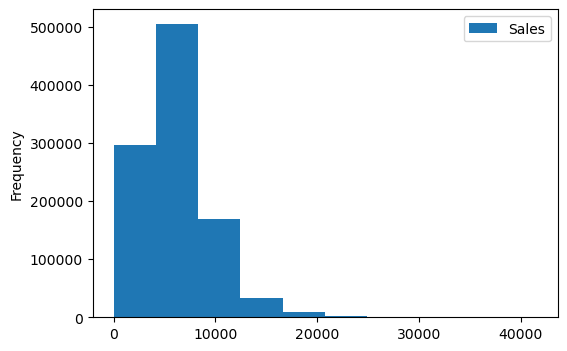

In [19]:
merged.plot(y=["Sales"], kind = "hist", figsize = (6,4))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

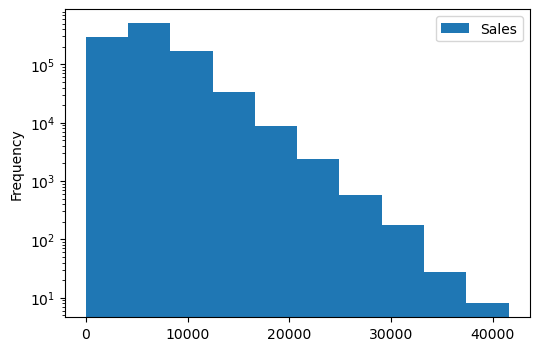

In [20]:
# To display the outliers in the histogram 

merged.plot(y=["Sales"], kind = "hist", figsize = (6,4), log = True)
plt.show

----------------------------------------------

## 8. Data cleaning and visualisation



### 8.1 Treating outliers

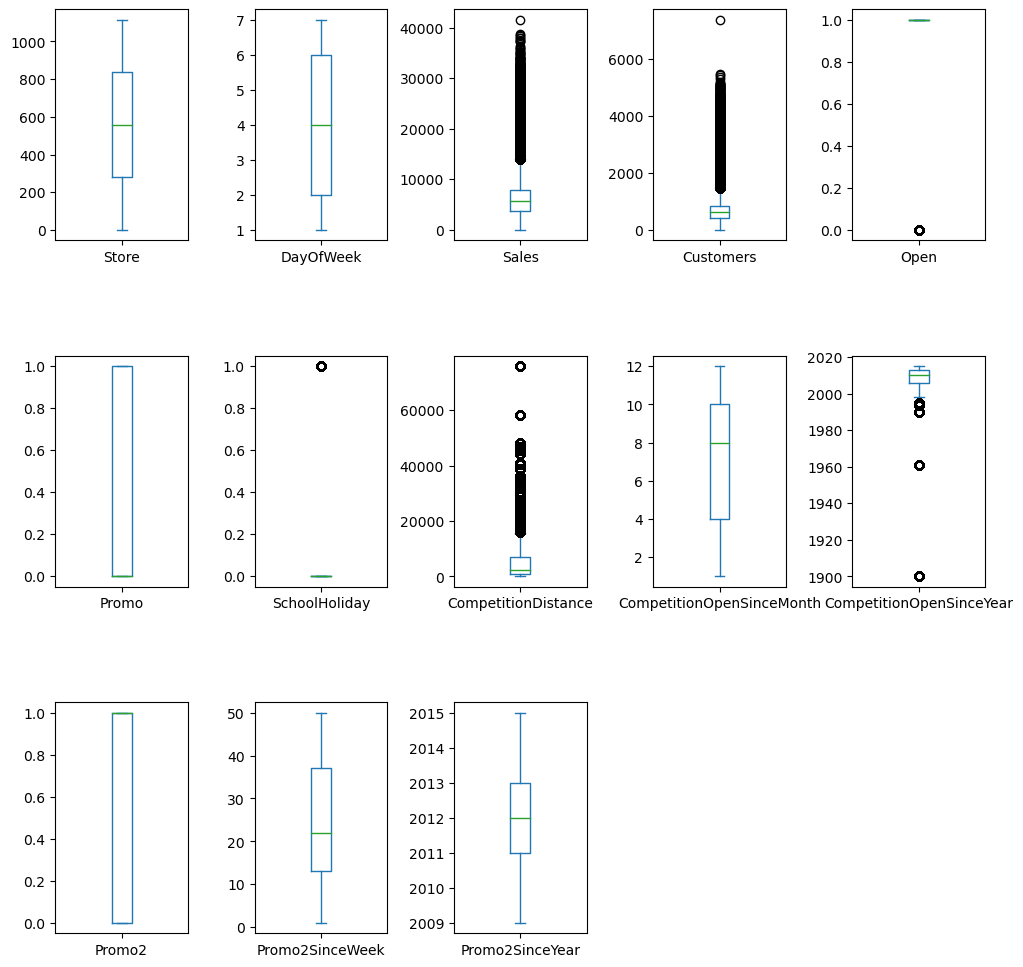

In [21]:
#outlier detection 
merged.plot(kind="box", subplots = True, figsize = (12,12),layout = (3,5))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

Using the boxplot, we can see that there are a number of columns with outliers. The focus will be on the "Sales" column for the contect of this assessment. Before removing/imputing outliers, they will be investigated first. 

In [22]:
#determine the lower and upper ranges of the data 

def calculate_outlier(df,column):
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

In [23]:
lower_ins,upper_ins = calculate_outlier(merged,"Sales")
print(lower_ins,upper_ins)

-2466.5 14049.5


Any values less than -2466.5 and greater than 14049.5 will be classified as an outlier for the Sales columns

In [24]:
#view the outliers in the data set

merged[(merged["Sales"]>upper_ins) | (merged["Sales"]<lower_ins)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
23,24,5,2015-07-31,14190,1082,1,1,0,1,a,c,4590.0,3.0,2000.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"
24,25,5,2015-07-31,14180,1586,1,1,0,1,c,a,430.0,4.0,2003.0,0,NaN,NaN,NaN
83,84,5,2015-07-31,14949,1439,1,1,0,1,a,c,11810.0,8.0,2014.0,0,NaN,NaN,NaN
107,108,5,2015-07-31,14927,992,1,1,0,0,d,c,2190.0,9.0,2003.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015767,788,3,2013-01-02,17934,1791,1,0,0,1,a,c,1530.0,3.0,2013.0,0,NaN,NaN,NaN
1015796,817,3,2013-01-02,25357,3462,1,0,0,1,a,a,140.0,3.0,2006.0,0,NaN,NaN,NaN
1015821,842,3,2013-01-02,20355,1257,1,0,0,1,d,c,1200.0,11.0,2007.0,0,NaN,NaN,NaN
1016093,1114,3,2013-01-02,20642,3401,1,0,0,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [25]:
# count outliers
merged[(merged["Sales"]>upper_ins) | (merged["Sales"]<lower_ins)].count()

Store                        26694
DayOfWeek                    26694
Date                         26694
Sales                        26694
Customers                    26694
Open                         26694
Promo                        26694
StateHoliday                 26694
SchoolHoliday                26694
StoreType                    26694
Assortment                   26694
CompetitionDistance          26674
CompetitionOpenSinceMonth    18723
CompetitionOpenSinceYear     18723
Promo2                       26694
Promo2SinceWeek               7298
Promo2SinceYear               7298
PromoInterval                 7298
dtype: int64

In [26]:
#Percentage of outliers 

num_outliers = merged[(merged["Sales"]>upper_ins) | (merged["Sales"]<lower_ins)].count()
num_outliers

percentage_outliers = num_outliers / len(merged["Sales"]) * 100
percentage_outliers

Store                        2.624239
DayOfWeek                    2.624239
Date                         2.624239
Sales                        2.624239
Customers                    2.624239
Open                         2.624239
Promo                        2.624239
StateHoliday                 2.624239
SchoolHoliday                2.624239
StoreType                    2.624239
Assortment                   2.624239
CompetitionDistance          2.622273
CompetitionOpenSinceMonth    1.840625
CompetitionOpenSinceYear     1.840625
Promo2                       2.624239
Promo2SinceWeek              0.717453
Promo2SinceYear              0.717453
PromoInterval                0.717453
dtype: float64

After investigating the sales outliers, we can see that they are high or low values compared to the values in the sale column. These outliers fall outside the range of -2466.5 to 14049.5. Negative sales values indicate that the store owes credits to customers. The majority of sales outliers were observed in late July or early January, and correspond to products belonging to assortments 'a' or 'c'. The total number of sales outliers is 26694, which represents 2.6% of the total dataset. This was determined using the formula (26694/1017209)*100.

Outliers in the sales values can lead to inaccurate forcasts. They are unlikely due to an error in the dataset , so simply removing them is not the best course of action. Instead, I will treat them using the capping technique or Winsorization. Capping involves setting a maximum and/or minimum threshold for the data. Any values that fall outside of that range are adjusted to the nearest threshold value. By doing so, the accuracy of our forecasts will improve - while still accounting for the outliers. 

In [27]:
from scipy.stats.mstats import winsorize

# Use winsorize function to winsorize the sales data
winsorized_sales = winsorize(merged['Sales'], limits=[0.01, 0.01])

# Add the winsorized sales data to the DataFrame
merged['sales_winsorized'] = winsorized_sales

This code uses the winsorize function from the scipy.stats.mstats library to winsorize the Sales data in the merged DataFrame. Winsorizing is a technique for dealing with outliers in the data by capping extreme values to a specified percentile of the data distribution, rather than simply removing them.

The winsorize function takes two arguments - the first is the data to be winsorized (in this case, the Sales column from the merged DataFrame), and the second is a list of two values specifying the limits of the winsorization. In this case, the limits are set to [0.01, 0.01], which means that the 1st and 99th percentile of the data are used as the minimum and maximum values for winsorizing, respectively.

The winsorized data is then added to the merged DataFrame as a new column called sales_winsorized. This column contains the winsorized Sales values, which have been capped at the 1st and 99th percentile of the data distribution. This reduces the impact of outliers on our analysis, while still retaining the majority of the data.

In [28]:
#check if sales_winsorized has been added to the df
merged.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,sales_winsorized
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5263
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",6064
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",8314
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,13995
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,4822


Using describe function and boxplots, I will view the statstics of the sales vlues before and after handling outliers. Comparing these values shows that the presence of outliers was affecting the mean and increasing the standard deviation of the original data. By winsorizing the data, we have reduced the impact of the outliers, resulting in a lower mean and smaller standard deviation. 

In [29]:
merged["sales_winsorized"].describe()

count    1.017209e+06
mean     5.743034e+03
std      3.733231e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      1.716000e+04
Name: sales_winsorized, dtype: float64

In [30]:
merged["Sales"].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

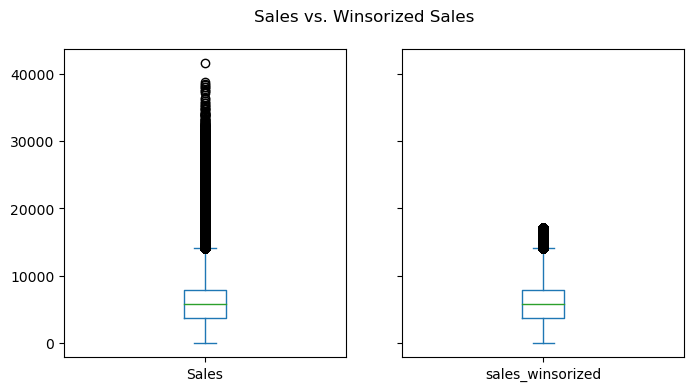

In [31]:
# Select only the relevant columns
subset = merged[['Sales', 'sales_winsorized']]

# Create the box plots
subset.plot(kind="box", subplots=True, figsize=(8,4), sharey=True)

# Set the subplot titles
plt.suptitle("Sales vs. Winsorized Sales")

# Display the plot
plt.show()

### 8.2 Treating missing values

In [32]:
 #to find the percentage of missing values
    
percentage_of_na = 100 * merged.isna().sum()/merged.shape[0] 
percentage_of_na

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
sales_winsorized              0.000000
dtype: float64

"CompetitionDistance" has 0.25% of missing data. Similarly, "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear" have around 31% of their data missing. "Promo2SinceWeek", "Promo2SinceYear", and "PromoInterval" have almost 50% of their data missing. After further investigation, it is fair to say that all msiing values for CompetitionDistance are aslo missing in CompetitionOpenSinceMonth/Year". To preserve the data. I am going to impute these mssing values in the "CompetitionDistance" with the mean because this varaible is Continuous. I am also going to impute mssing values in the "CompetitionOpenSinceMonth/Year" with the mode because month/year are ordinal categorical data.

In [33]:
#Display missing values

merged[merged["CompetitionDistance"].isna()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,sales_winsorized
290,291,5,2015-07-31,10052,973,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN,10052
621,622,5,2015-07-31,6306,540,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,6306
878,879,5,2015-07-31,6000,466,1,1,0,0,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov",6000
1405,291,4,2015-07-30,9030,883,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN,9030
1736,622,4,2015-07-30,5412,406,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,5412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015601,622,3,2013-01-02,4080,451,1,0,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,4080
1015858,879,3,2013-01-02,3077,326,1,0,0,1,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov",3077
1016385,291,2,2013-01-01,0,0,0,0,a,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN,0
1016716,622,2,2013-01-01,0,0,0,0,a,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,0


In [34]:
#find the mean

mean_comp_dis = merged["CompetitionDistance"].mean()
mean_comp_dis

5430.085652302903

In [35]:
#impute with the mean
merged["CompetitionDistance"].fillna(value="mean_comp_dis", inplace = True)

In [36]:
#find mssing values 
merged[merged["CompetitionOpenSinceMonth"].isna()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,sales_winsorized
11,12,5,2015-07-31,8959,962,1,1,0,1,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct",8959
12,13,5,2015-07-31,8821,568,1,1,0,0,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov",8821
15,16,5,2015-07-31,10231,979,1,1,0,1,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN,10231
18,19,5,2015-07-31,8234,718,1,1,0,1,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec",8234
21,22,5,2015-07-31,6566,633,1,1,0,0,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct",6566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017189,1096,2,2013-01-01,0,0,0,0,a,1,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec",0
1017193,1100,2,2013-01-01,0,0,0,0,a,1,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,0


In [37]:
#Impute with the mode 
merged['CompetitionOpenSinceMonth'] = merged['CompetitionOpenSinceMonth'].fillna(merged['CompetitionOpenSinceMonth'].mode()[0])
merged['CompetitionOpenSinceYear'] = merged['CompetitionOpenSinceYear'].fillna(merged['CompetitionOpenSinceYear'].mode()[0])

In [38]:
#Check if the missing data has been replaced 
merged["CompetitionDistance"].isna().sum()

0

In [39]:
merged["CompetitionOpenSinceMonth"].isna().sum()

0

In [40]:
merged["CompetitionOpenSinceYear"].isna().sum()

0

Missing values in "Promo2SinceWeek/year" and "PromoInterval" occurred because there was no promotion 2. In order to clean the data, I will filter the dataset to include only rows where the promotion value is equal to 1

In [41]:
#Check that mssing vlaues only occure when there is no promo2

merged[merged["Promo2"] == 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,sales_winsorized
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5263
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,13995
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,4822
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN,5651
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN,15344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017201,1108,2,2013-01-01,0,0,0,0,a,1,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN,0
1017203,1110,2,2013-01-01,0,0,0,0,a,1,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN,0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,9.0,2013.0,0,NaN,NaN,NaN,0


In [42]:
#Check that mssing vlaues only occure when there is no promo2 (promo2=0)

merged[merged["Promo2"] == 0].isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
sales_winsorized                  0
dtype: int64

In [43]:
merged.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
sales_winsorized                  0
dtype: int64

There should be no sales when the store is closed. Also, as discussed, there are mssing values when the there is no promo2 happening. Thefore, I am going to filter rows with Open = 0 and promo2 = 0

In [44]:
merged = merged[(merged["Open"] == 1) & (merged["Promo2"] == 1)]

In [45]:
#check if the filter was complete and if there are any msiisng values 
merged.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
sales_winsorized             0
dtype: int64

### 8.3 Data wrangling

In [46]:
#stripping whitespace

merged["StoreType"] = merged["StoreType"].str.strip()
merged["Assortment"] = merged["Assortment"].str.strip()

C:\Users\DanaH\AppData\Local\Temp\ipykernel_10116\3015047423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged["StoreType"] = merged["StoreType"].str.strip()
C:\Users\DanaH\AppData\Local\Temp\ipykernel_10116\3015047423.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged["Assortment"] = merged["Assortment"].str.strip()


In [47]:
# Convert dataset to lowercase

merged["StoreType"] = merged["StoreType"].str.lower()
merged["Assortment"] = merged["Assortment"].str.lower()
merged["StateHoliday"] = merged["StateHoliday"].str.lower()

C:\Users\DanaH\AppData\Local\Temp\ipykernel_10116\2602627044.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged["StoreType"] = merged["StoreType"].str.lower()
C:\Users\DanaH\AppData\Local\Temp\ipykernel_10116\2602627044.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged["Assortment"] = merged["Assortment"].str.lower()
C:\Users\DanaH\AppData\Local\Temp\ipykernel_10116\2602627044.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [48]:
#To seperate the dates into new clolumns 

merged["Year"] = train["Date"].dt.year
merged["Month"] = train["Date"].dt.month
merged["Day"] = train["Date"].dt.day

C:\Users\DanaH\AppData\Local\Temp\ipykernel_10116\1926377312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged["Year"] = train["Date"].dt.year
C:\Users\DanaH\AppData\Local\Temp\ipykernel_10116\1926377312.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged["Month"] = train["Date"].dt.month
C:\Users\DanaH\AppData\Local\Temp\ipykernel_10116\1926377312.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [49]:
merged.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,sales_winsorized,Year,Month,Day
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",6064,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",8314,2015,7,31
10,11,5,2015-07-31,10457,1236,1,1,0,1,a,...,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",10457,2015,7,31
11,12,5,2015-07-31,8959,962,1,1,0,1,a,...,9.0,2013.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",8959,2015,7,31
12,13,5,2015-07-31,8821,568,1,1,0,0,d,...,9.0,2013.0,1,45.0,2009.0,"Feb,May,Aug,Nov",8821,2015,7,31


----------------------------------------

## 9.  Exploratory insights and visualisation

**What is the aggregated sales output when viewed according to months, and what insights can be found regarding the contribution of running a promotion?**

In [50]:
pivot_sales = pd.pivot_table(merged,index="Month", columns = "Promo", values="sales_winsorized", aggfunc=np.sum)
pivot_sales

Promo,0,1
Month,,
1,128007576,145488577
2,128421671,125731034
3,124515718,165641030
4,122175790,154314782
5,132044444,140706950
6,132240542,145375677
7,117137276,158124950
8,77761143,84729070
9,73928062,80279036


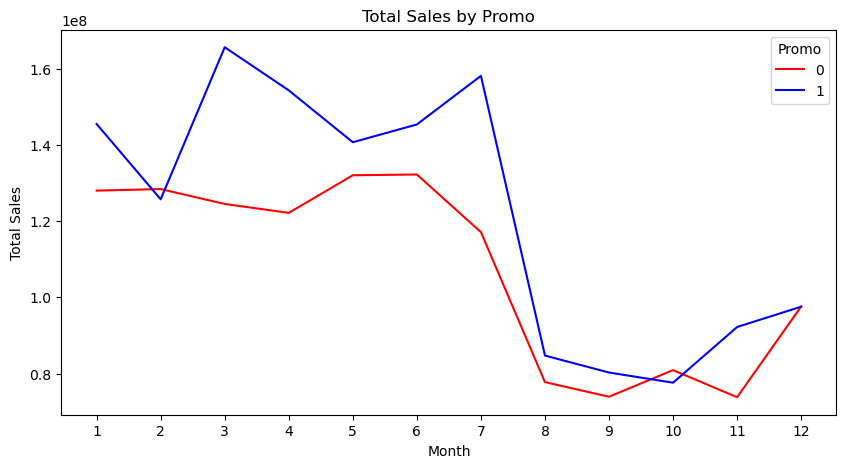

In [51]:
pivot_sales.plot(kind='line', figsize=(10, 5), color = ["red", "blue"])

# Set the title and axis labels
plt.title('Total Sales by Promo')
plt.xlabel('Month')
plt.ylabel('Total Sales')

#To display all months 
plt.xticks(pivot_sales.index)

# Display the plot
plt.show()

Comparing the sales values when there is promoiotn versus no prmotion over 12 months period reveals that generally promotion is an effective strategy to boost sales. Sales are higher at the beginning of the year, followed by minor fluctuation, then a significant drop in August. Then they slightly increase in November. 

**What is the sales output when viewed according to months, and what insights can be found regarding the effect of Assortment?**

In [52]:
pivot_sales = pd.pivot_table(merged,index="Month", columns = "Assortment", values="sales_winsorized", aggfunc=np.sum)
pivot_sales

Assortment,a,b,c
Month,,,
1,141277090,2047894,130171169
2,130706139,2048789,121397777
3,148172693,2347860,139636195
4,142070110,2378254,132042208
5,139271785,2597107,130882502
6,141724730,2471600,133419889
7,136825756,2338291,136098179
8,78703410,1302760,82484043
9,75725638,1324989,77156471


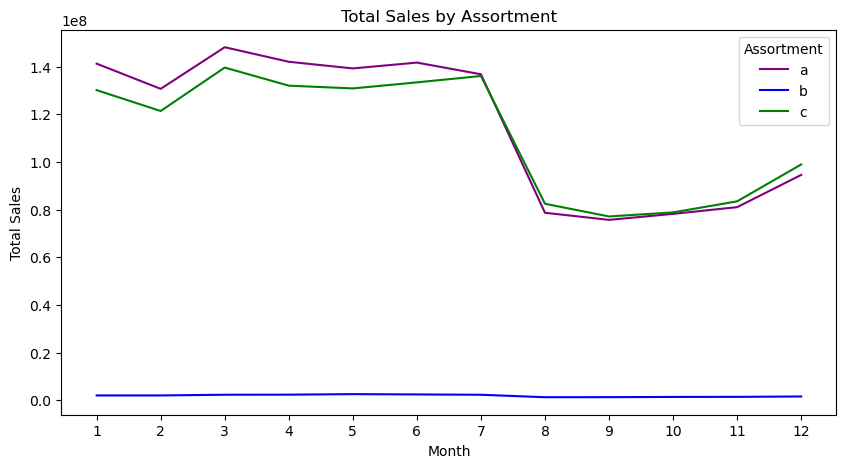

In [53]:
pivot_sales.plot(kind='line', figsize=(10, 5), color = ["purple", "blue", "green"])

# Set the title and axis labels
plt.title('Total Sales by Assortment')
plt.xlabel('Month')
plt.ylabel('Total Sales')

#To display all months 
plt.xticks(pivot_sales.index)

# Display the plot
plt.show()

The line plot illustrates that assortment "b" consistently has the lowest sales value throughout the year and is the least popular assortment. On the other hand, assortments "a" and "c" follow a similar pattern, with assortment "a" having slightly higher sales than assortment "c". These observations are consistent with the trend observed in the previous plot, where sales are higher at the beginning of the year, followed by a dip in August, and then a slight increase in November and December.

**Investigate any trends in the sales values according to quarterly performance. Start by creating a quarterly column using your DateTime column(see df.dt.quarter)?**

In [54]:
# Create a quarterly column
merged['Quarter'] = merged['Date'].dt.quarter

# Reshape the data
sales_quarterly = pd.pivot_table(merged, index='Quarter', columns='StoreType', values='sales_winsorized', aggfunc=np.sum)
sales_quarterly

C:\Users\DanaH\AppData\Local\Temp\ipykernel_10116\429285568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['Quarter'] = merged['Date'].dt.quarter


StoreType,a,b,c,d
Quarter,,,,
1,417500227,9873614,101130504,289301261
2,420470706,10856090,101706232,293825157
3,303197840,7625523,75932028,205204146
4,264855677,6906299,69249974,178710821


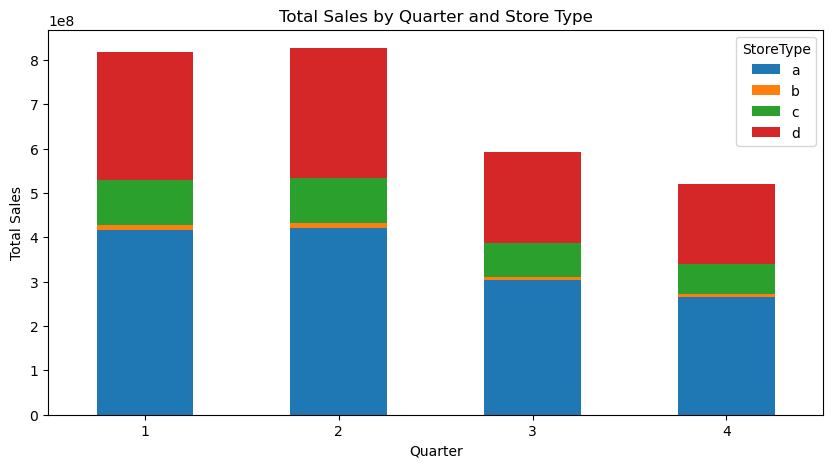

In [55]:
# Create a stacked bar chart to visualize the pivot table
sales_quarterly.plot(kind='bar', stacked=True, figsize=(10, 5))

# Set the title and axis labels
plt.title('Total Sales by Quarter and Store Type')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=360)

# Display the plot
plt.show()

The plot suggests that store type a performs better than the other store types in terms of sales values, while store types b, c, and d have lower sales values and relatively similar performance throughout the year. There is also a noticeable trend of sales values dropping in the third quarter and increasing slightly in the fourth quarter for all store types.

**What is the sales output when viewed according to days of the week and what is the effect of running a promotion with regard to sales?**

In [56]:
sales_daily = pd.pivot_table(merged, index='DayOfWeek', columns='Promo', values='sales_winsorized', aggfunc=np.sum)
sales_daily

Promo,0,1
DayOfWeek,,
1,172081117.0,357776371.0
2,176086988.0,301950812.0
3,171276927.0,277657016.0
4,161888218.0,263911685.0
5,197708389.0,266489442.0
6,403587119.0,NaN
7,5932015.0,NaN


After opening the original file of the data, it was discovered that the NaN values in the Promo column for Days 6 and 7 were not missing values, but rather a result of no promotions being run on those two days.

In [57]:
merged[(merged["DayOfWeek"] == 6) | (merged["DayOfWeek"] == 7) & (merged["Promo"] == 1)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,sales_winsorized,Year,Month,Day,Quarter
6691,2,6,2015-07-25,2512,316,1,0,0,0,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2512,2015,7,25,3
6692,3,6,2015-07-25,3878,412,1,0,0,0,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",3878,2015,7,25,3
6700,11,6,2015-07-25,4712,642,1,0,0,0,a,...,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",4712,2015,7,25,3
6701,12,6,2015-07-25,5185,651,1,0,0,0,a,...,2013.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",5185,2015,7,25,3
6702,13,6,2015-07-25,4361,340,1,0,0,0,d,...,2013.0,1,45.0,2009.0,"Feb,May,Aug,Nov",4361,2015,7,25,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012740,1106,6,2013-01-05,2624,360,1,0,0,0,a,...,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2624,2013,1,5,1
1012741,1107,6,2013-01-05,5128,612,1,0,0,0,a,...,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",5128,2013,1,5,1
1012743,1109,6,2013-01-05,2897,279,1,0,0,0,c,...,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct",2897,2013,1,5,1
1012745,1111,6,2013-01-05,3325,291,1,0,0,0,a,...,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",3325,2013,1,5,1


In [58]:
#check which cells in the df contain the values of Dayofweek = 6 or 7 combined with promo =1 

merged[(merged["DayOfWeek"].isin([6,7])) & (merged["Promo"] == 1)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,sales_winsorized,Year,Month,Day,Quarter


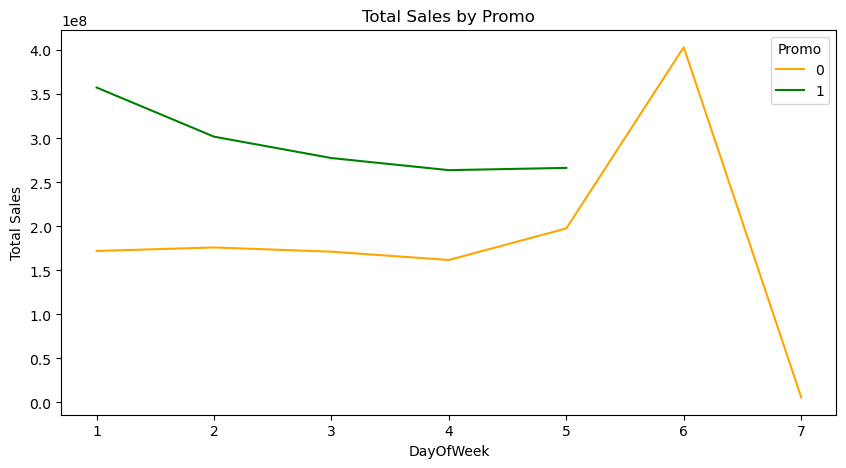

In [59]:
sales_daily.plot(kind='line', figsize=(10, 5), color = ["orange", "green"])

# Set the title and axis labels
plt.title('Total Sales by Promo')
plt.xlabel('DayOfWeek')
plt.ylabel('Total Sales')

#To display all months 
plt.xticks(sales_daily.index)

# Display the plot
plt.show()

No promotion was offered on Saturdays and Sundays as indicated by the NaN values. Therefore, the green line stops at Day 5 (Friday). Overall, during weekdays, promotions can boost sales as seen by the higher values on the y-axis. However, sales spikes without promotions on Saturdays, and then drop significantly on Sundays.

---------------------------------------------------------------

## 10. Conclusion 

Based on this EDA, it can be concluded that running promotions is an effective strategy for boosting sales at Rossman drug stores. Addtionally, sales are higher at the beginning of the year, followed by minor fluctuations and a significant drop in August, and then a slight increase in November and December. Assortment "b" has the lowest sales value throughout the year. On the other hand, assortments "a" and "c" follow a similar pattern, with assortment "a" having slightly higher sales than assortment "c". Store type A performs better than the other store types in terms of sales values, while store types b, c, and d have lower sales values and relatively similar performance throughout the year. There is also a noticeable trend of sales values dropping in the third quarter and increasing slightly in the fourth quarter for all store types.

Regarding day-to-day sales, promotions can boost sales during weekdays. However, sales spikes without promotions on Saturdays, and then drop significantly on Sundays.

To boost sales, the following suggestions could be considered:

Running promotions during periods of low sales, such as August/Sundays, to stimulate demand.

Improving the product assortment for "b". 

Identifying the factors that lead to store type A's superior performance and applying those best practices to other store types

To predict the sales over the next 6 weeks (May to June), it is expected that the total sales values may experience minor fluctuations before starting to decrease. Further investigation and analysis are recommended to confirm any trends or patterns in the data.

------------------------------

## 11. References  

- Exploratory Data Analysis of Rossman Drug Store Sales. Retrieved on 25 March 2023 from https://www.kaggle.com/competitions/rossmann-store-sales/overview


- Fortiviti. Understanding Negative Balances in Your Financial Statements. Retrieved April 21, 2023, from https://www.fortiviti.com/understanding-negative-balances-in-your-financial-statements/#:~:text=A%20negative%20revenue%20figure%20may,figure%2C%20as%20it%20should).


- SAP. SAP Forecasting and Replenishment add-on for Fresh Products. Retrieved April 21, 2023, from https://help.sap.com/docs/SAP_FORECASTING_AND_REPLENISHMENT_ADD_ON_FOR_FRESH_PRODUCTS/11659051659841bf8081f6b63308b030/8b095254c350c432e10000000a44538d.html?version=1.0.4